<a href="https://colab.research.google.com/github/li0ne/q-macro/blob/main/HPfilter_ipynb_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Standard Deviation of Japan GDP cyclical component: 0.016100214545195696
Standard Deviation of Netherlands GDP cyclical component: 0.016587887204182177
Correlation coefficient between Japan and Netherlands GDP cyclical components: 0.5701121533053284


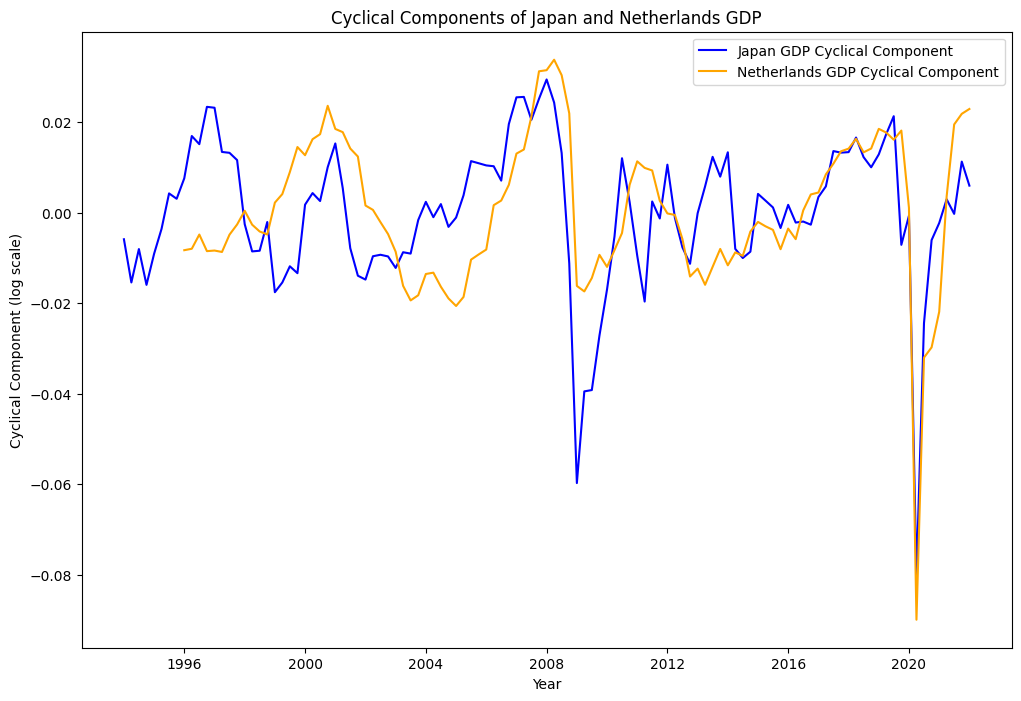

In [3]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# set the start and end dates for the data
start_date = '1950-01-01'
end_date = '2022-01-01'

# download the data from FRED using pandas_datareader
gdp_jp = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)
gdp_nl = web.DataReader('CLVMNACSCAB1GQNL', 'fred', start_date, end_date)  # Netherlands GDP

# calculate the log of real GDP
log_gdp_jp = np.log(gdp_jp)
log_gdp_nl = np.log(gdp_nl)

# apply a Hodrick-Prescott filter to the data to extract the cyclical and trend components
cycle_jp, trend_jp = sm.tsa.filters.hpfilter(log_gdp_jp, lamb=1600)
cycle_nl, trend_nl = sm.tsa.filters.hpfilter(log_gdp_nl, lamb=1600)

# Calculate the standard deviation of the cyclical components
std_cycle_jp = cycle_jp.std()
std_cycle_nl = cycle_nl.std()

# Calculate the correlation coefficient between the cyclical components
correlation = cycle_jp.corr(cycle_nl)

# Print the results
print(f"Standard Deviation of Japan GDP cyclical component: {std_cycle_jp}")
print(f"Standard Deviation of Netherlands GDP cyclical component: {std_cycle_nl}")
print(f"Correlation coefficient between Japan and Netherlands GDP cyclical components: {correlation}")

# Plot the cyclical components
plt.figure(figsize=(12, 8))
plt.plot(cycle_jp, label="Japan GDP Cyclical Component", color='blue')
plt.plot(cycle_nl, label="Netherlands GDP Cyclical Component", color='orange')
plt.xlabel('Year')
plt.ylabel('Cyclical Component (log scale)')
plt.title('Cyclical Components of Japan and Netherlands GDP')
plt.legend()
plt.show()


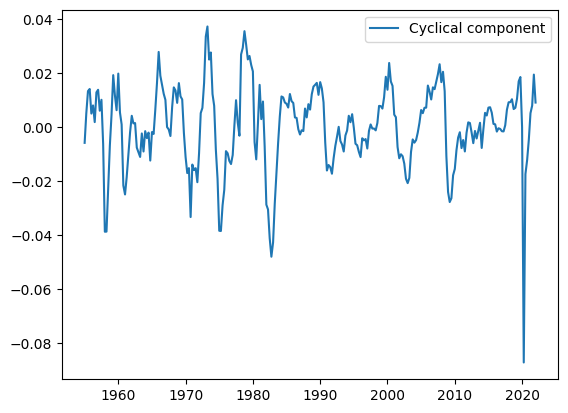

Cycle mean: -1.2989857021502723e-13
Cycle standard deviation: 0.015382726767609416


In [ ]:
# Plot the cycle component
plt.plot(cycle, label="Cyclical component")

# Add a legend and show the plot
plt.legend()
plt.show()

cycle_mean = cycle.mean()
cycle_std = cycle.std()

print("Cycle mean:", cycle_mean)
print("Cycle standard deviation:", cycle_std)
